Name: Nguyen Vu Anh Ngoc  
Class: DSEB63  
ID: 11214369

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Functions

In [2]:
class LinearRegression:
    def __init__(self, degree=1, reg=None, tol=1e-6, alpha=0.0):
        self.degree = degree
        self.reg = reg
        self.alpha = alpha
        self.tol = tol
        self.w = None
    
    def fit(self, X, y):
        X_poly = self._generate_polynomial_features(X)
        if self.reg == 'l2':
            self.w = self._ridge_regression(X_poly, y)
        elif self.reg == 'l1':
            self.w = self._lasso_regression(X_poly, y)
        else:
            self.w = self._ordinary_least_squares(X_poly, y)
    
    def predict(self, X):
        X_poly = self._generate_polynomial_features(X)
        return X_poly.dot(self.w)
    
    def _generate_polynomial_features(self, X):
        return np.vander(X, self.degree + 1, increasing=True)
    
    def _ordinary_least_squares(self, X, y):
        w_ols = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) 
        return w_ols
    
    def _ridge_regression(self, X, y):
        identity_matrix = np.identity(X.shape[1])
        w_ridge = np.linalg.inv(X.T.dot(X) + self.alpha * identity_matrix).dot(X.T).dot(y)
        return w_ridge
    
    def _soft_thresholding_operator(self, x, lambda_):
        if x > 0 and lambda_ < abs(x):
            return x - lambda_
        elif x < 0 and lambda_ < abs(x):
            return x + lambda_
        else:
            return 0
    
    def _coordinate_descent(self, X, y, w, alpha):
        n, m = X.shape
        for _ in range(1000):
            w_prev = w.copy()
            
            for j in range(m):
                # Compute residuals excluding feature j
                r = y - X.dot(w) + X[:, j] * w[j]
                
                # Soft thresholding
                z = np.dot(X[:, j], r)
                w[j] = self._soft_thresholding_operator(z, self.alpha) / (X[:, j]**2).sum()
                
            # Convergence check
            if np.sqrt(((w - w_prev)**2).sum()) < self.tol:
                break
                
        return w

    def _lasso_regression(self, X, y):
        w_initial = np.zeros(X.shape[1])
        w_lasso =  self._coordinate_descent(X, y, w_initial, self.alpha)
        return  w_lasso
    
    
    def evaluate(self, X, y):
        y_pred = self.predict(X)
        mse = np.mean((y - y_pred) ** 2)
        rmse = np.sqrt(mse)
        mae = np.mean(np.abs(y - y_pred))
        mape = np.mean(np.abs((y - y_pred) / y)) * 100
        r2_score = 1 - np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2)
        print('MSE: {:.3f}, RMSE: {:.3f}, MAE: {:.3f}, R2 Score: {:.6f}%, MAPE: {:.6}%'.format(mse, rmse, mae, r2_score*100, mape))
    
    def plot_data(self, X, y):
        plt.figure(figsize=(8, 4))
        plt.scatter(X, y, s=60, facecolors='none', edgecolors='blue')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.show()
    
    def plot(self, X, y):
        X_pred = np.linspace(X.min(), X.max(), 100)
        y_pred = self.predict(X_pred)

        plt.figure(figsize=(8, 4))
        plt.scatter(X, y, s=60, facecolors='none', edgecolors='blue')
        plt.plot(X_pred, y_pred, color='red')
        plt.title('n = {}, degree = {}, reg = {}, α = {}'.format(X.shape[0], self.degree, self.reg, self.alpha))
        plt.xlabel('X')
        plt.ylabel('y')
        plt.show()


# 1. Parabolic linear regression model for `data_squared`

In [3]:
data = pd.read_csv('../data/data_square.csv')
data.columns = ['area', 'price']
data

,area,price
0,30.0000,-100.0000
1,32.4138,-190.7250
2,34.8276,-269.7980
3,37.2414,-337.2180
4,39.6552,-392.9850
5,42.0690,-437.0990
6,44.4828,-469.5600
7,46.8966,-490.3690
8,49.3103,-499.5240
9,51.7241,-497.0270


In [4]:
# Scale data
data['area'] = data['area'] / 100
data['price'] = data['price'] / 1000

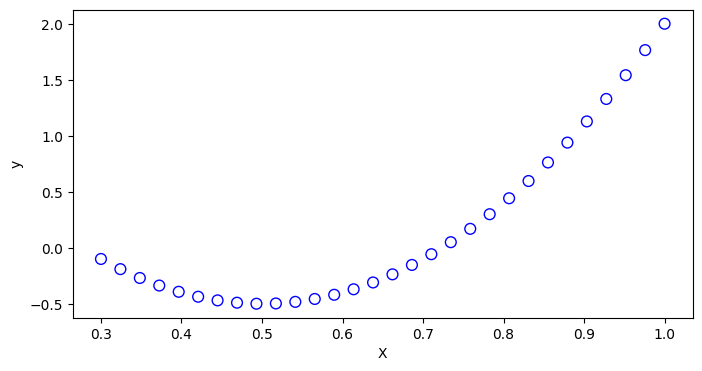

In [5]:
X, y = data['area'].values, data['price'].values
model = LinearRegression(degree=2)
model.plot_data(X, y)

MSE: 0.000, RMSE: 0.000, MAE: 0.000, R2 Score: 100.000000%, MAPE: 0.000361848%


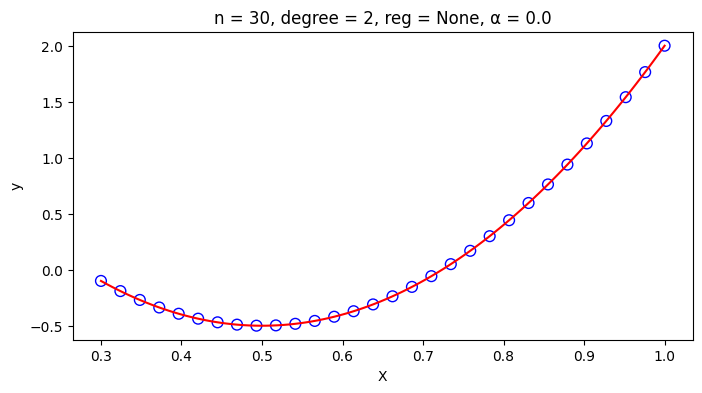

In [6]:
model.fit(X, y)
model.evaluate(X, y)
model.plot(X, y)

# 2. Polynomial linear regression for `data_sine`

### a. Fit polynomials of degree `[0,1,3,6,9]`

In [7]:
data = pd.read_csv('../data/data_sine.csv')
data

,X,y
0,0.00,0.35
1,0.12,0.82
2,0.25,1.00
3,0.37,0.92
4,0.42,0.18
5,0.55,0.20
6,0.68,-0.90
7,0.80,-0.45
8,0.90,-0.55
9,1.00,0.25


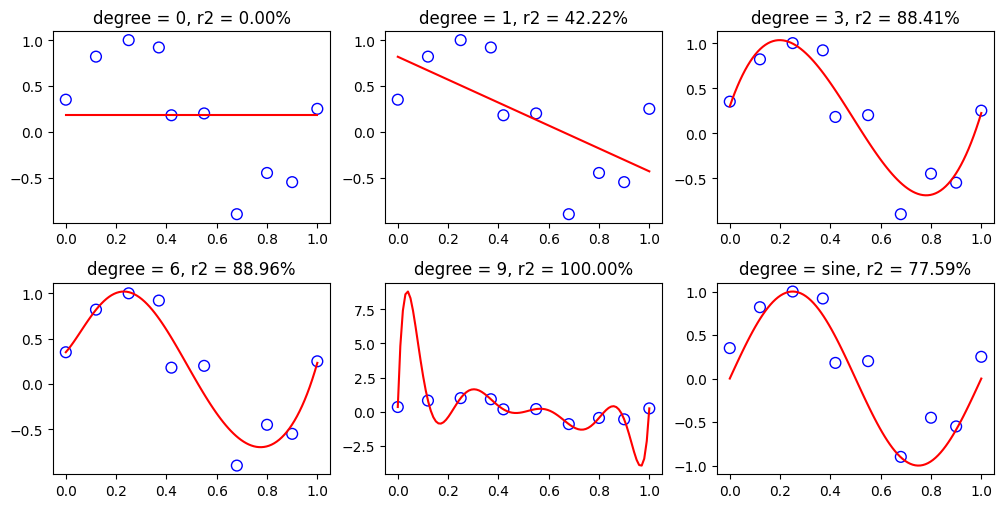

In [8]:
X, y = data['X'].values, data['y'].values
model = LinearRegression(degree=2)

degrees = [0, 1, 3, 6, 9, 'sine']

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

# Plot the dataset
for i, deg in enumerate(degrees):
    if deg == 'sine':
        X_pred = np.linspace(X.min(), X.max(), 100)
        y_pred = [np.sin(2 * np.pi * x) for x in X_pred]
        r2_score = 1 - np.sum((y - [np.sin(2 * np.pi * x) for x in X]) ** 2) / np.sum((y - np.mean(y)) ** 2)
    else:
        model = LinearRegression(degree=deg)
        model.fit(X, y)
        X_pred = np.linspace(X.min(), X.max(), 100)
        y_pred = model.predict(X_pred)
        r2_score = 1 - np.sum((y - model.predict(X)) ** 2) / np.sum((y - np.mean(y)) ** 2)
    
    
    ax = axs[i//3, i%3]
    ax.scatter(X, y, s=60, facecolors='none', edgecolors='blue')
    ax.plot(X_pred, y_pred, color='red')
    ax.set_title(f'degree = {deg}, r2 = {r2_score*100:.2f}%')
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

**Linear Fit (Degree 1):**

The model appears to be too simplistic for the data.
The subtle variations or underlying patterns of the data points are not captured.

**Cubic Fit (Degree 3):**

A better fit to the data.
It captures more of the data's curvature and seems to be closer to the true underlying function.

**Higher Degree Fits:**

The polynomial fit seems to account for even the smallest fluctuations in the data as the degree increases. 
However, this can lead to overfitting, where the model becomes too closely tailored to the training data and might perform poorly on new, unseen data.

### b. Add `15,100` data points for the 9th degree polynomial

MSE: 0.030, RMSE: 0.172, MAE: 0.127, R2 Score: 91.640092%, MAPE: 41.7179%


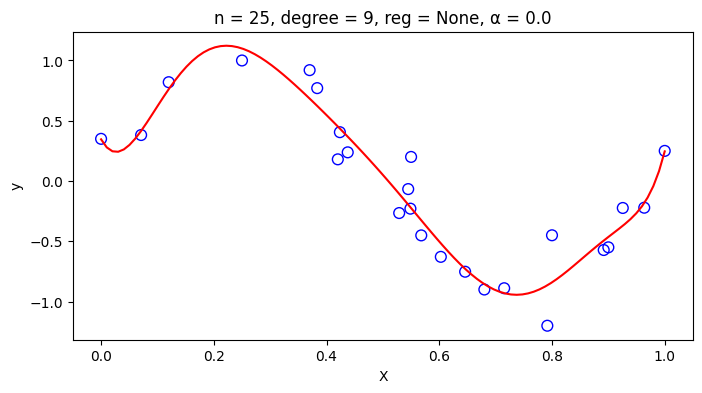

In [9]:
# Add 15 data points
np.random.seed(0)

# Extend X, y
X_new = np.append(X, np.random.uniform(0, 1, 15))
y_new = np.append(y, np.sin(2 * np.pi * X_new[-15:]) + np.random.normal(0, 0.15, 15))

# Fit model
model = LinearRegression(degree=9)
model.fit(X_new, y_new)
model.evaluate(X_new, y_new)
model.plot(X_new, y_new)

MSE: 0.026, RMSE: 0.163, MAE: 0.135, R2 Score: 94.654997%, MAPE: 86.2164%


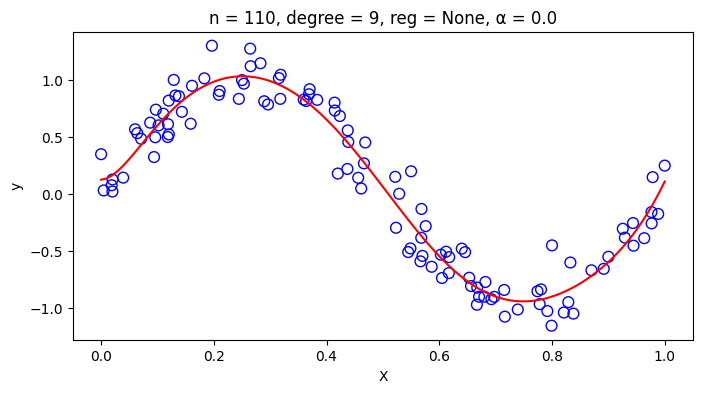

In [10]:
# Add 100 data points
np.random.seed(0)

# Extend X, y
X_new = np.append(X, np.random.uniform(0, 1, 100))
y_new = np.append(y, np.sin(2 * np.pi * X_new[-100:]) + np.random.normal(0, 0.15, 100))

# Fit model
model = LinearRegression(degree=9)
model.fit(X_new, y_new)
model.evaluate(X_new, y_new)
model.plot(X_new, y_new)

Because the model must now take into account more data, and to minimize sum of loss to to minimize mean of loss, the model now represents the underlying function more accurately.

### c. Fit a 9th degree polynomial to the original 10 data points but use `Ridge` to avoid overfitting.

MSE: 0.048, RMSE: 0.219, MAE: 0.180, R2 Score: 87.218173%, MAPE: 47.9722%


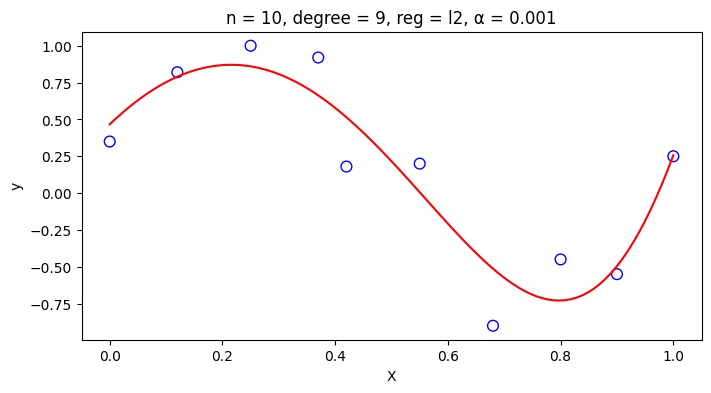

In [11]:
ridge_model = LinearRegression(degree=9, reg='l2', alpha=0.001)
ridge_model.fit(X, y)
ridge_model.evaluate(X, y)
ridge_model.plot(X, y)

### d. Fit a 9th degree polynomial to the original 10 data points but use `Lasso` to avoid overfitting.

MSE: 0.047, RMSE: 0.216, MAE: 0.172, R2 Score: 87.629667%, MAPE: 46.5881%


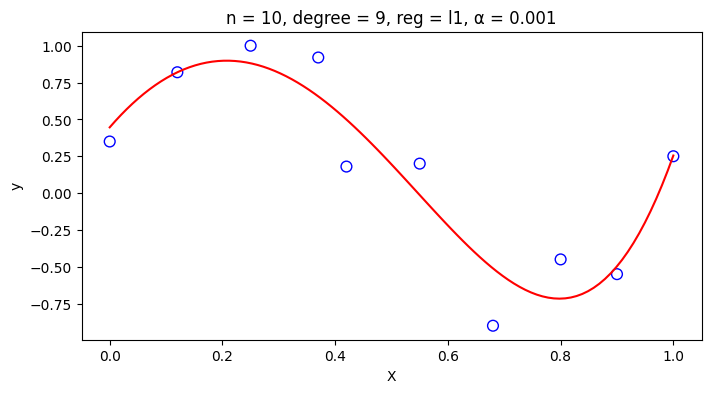

In [12]:
lasso_model = LinearRegression(degree=9, reg='l1', alpha=0.001)
lasso_model.fit(X, y)
lasso_model.evaluate(X, y)
lasso_model.plot(X, y)